In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#Loading the data

In [ ]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 28.7MB/s]


In [ ]:
df = pd.read_csv('spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#EDA

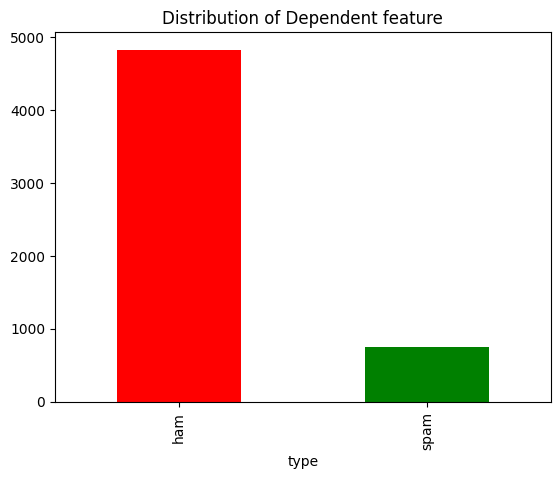

In [ ]:
freq = pd.value_counts(df["type"], sort= True)
freq.plot(kind= 'bar', color= ["red", "green"])
plt.title('Distribution of Dependent feature')
plt.show()

**Observation**:

As we can see, the number of texts which are spam are quite less as compared to the texts which are ham (or not spam)

Clearly, we have an **imbalanced data**!


# **Preprocessing data**

####1. Tokenization

Let's first split the sentence into it's constituent words (i.e. individual **tokens**)

This is also known as **tokenization**

<br>


Lets take an example to understand this:

Sentence:  **"Hi my name is Anthony Gonsalves."**

After splitting the sentence, we get

List: ["my", 'Hi", "is", "Gonsalves", "Anthony", "name", "."]




### 2. Lower Casing

#### Q. Given two setences, Should they be treated as different or same?

Sentence 1 : Let's go to the mall

Sentence 2: let's GO to the MALL

Ans: **No!**. We don't want to treat these **intances/ sentences** as different one.

<br>


#### Q. How do we resolve this?

One way to avoid multiple instances of same word/sentence is to **convert them to lower case**.







#### 3. Removing punctuations

```
Mail 1 : "I, Nigerian price need your help. Send money"

Mail 2: "Meeting scheduled for 5 pm. Kindly revert"
```

In order to differentiate between spam v.s ham,
- we focused on **keywords** which helped us in differentiating.

<br>

#### Q. Do we need to look at punctuations while classfying mails?

Ans: No. As our focus is keyword which can help us classify.

Hence, we will be removing these using the **Regular Expressions**.


#### 4. Stop Words

#### Q. Do you think words like a, an, the, of are useful in classifying spam from ham ?

These words (a, an, the, do, it, she, it etc) are called **stop words**
- These are some of the most common, short function words and
- They add little or no **real meaning** to our text as  they carry **very little** useful information.

So, They can **safely be ignored without sacrificing the meaning of the sentence**.

Not to mention, parsing through these words would make it more **computationally expensive** for no reason.

We remove these words from our data.


Do NOTE: But there are tasks like translation, Que-Ans based system  where we cannot remove stop words.



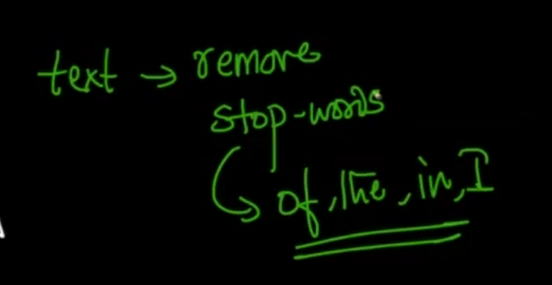

#### Q. Wouldn't removing stop words lead to grammatical errors?
**Yes**. It will.

But since to understand context from keywords, grammer is not important hence we use stopwords removal technique

Lets implement all of these text processing using the  [NLTK](https://www.nltk.org/) library

In [ ]:
# Libraries for text processing
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab as well
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

def clean_tokenized_sentence(s):
  cleaned_s = ""
  words = nltk.word_tokenize(s)
  for word in words:
    c_word = word.lower()
    c_word = re.sub(r'[^\w\s]','', c_word)

    if c_word != '' and c_word not in stopwords.words('english'):
      cleaned_s = cleaned_s + " " + c_word

  return cleaned_s.strip()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Calling the `clean_tokenized_sentence(s)` function onto each text in our dataset using the **apply** method, and storing them in a new column, `cleaned_message`

In [ ]:
df["cleaned_message"] = df["message"].apply(clean_tokenized_sentence)
df.head(10)

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...




## Q. Do some words tend to occur more frequently in ham texts than in spam texts?
Yes. Recall we talked about some keywords being specific to spam or ham messages.

Words like "Nigerian prince", "lottery", "prize", etc tend to occur more in spam messages than in ham.

<br>

#### Q. How can we look at the Word frequencies (number of times each word occurs) in a given text?

In order to get the frequency of occurrence of the words in a given text, we employ the use of `Counter` from the `collections` library.

The **Counter()** counts the number of time each word occurs after splitting.


<br>

#### Lets see the most occuring words in ham messages
#### Q. How do we get the top 20 words that occur the most frequently in ham texts?

We need to first filter the non-spam rows,
- then Obtain the cleaned message
- followed by Splitting the messages into words
- and finally Invoking the Counter() object

 First, let's filter the texts that are of type = 'ham'

In [ ]:
ham = df[df['type'] == 'ham']
ham

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
...,...,...,...
5565,ham,Huh y lei...,huh lei
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


Since we only wish to look at our preprocessed text, we get the cleaned_message column

In [ ]:
ham = ham['cleaned_message']
ham

,cleaned_message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
3,u dun say early hor u c already say
4,nah nt think goes usf lives around though
6,even brother like speak treat like aids patent
...,...
5565,huh lei
5568,ì_ b going esplanade fr home
5569,pity mood suggestions
5570,guy bitching acted like interested buying some...


In [ ]:
ham = " ".join(ham)
ham

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah nt think goes usf lives around though even brother like speak treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune gon na home soon nt want talk stuff anymore tonight k cried enough today searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday oh k watching eh u remember 2 spell name yes v naughty make v wet fine thatåõs way u feel thatåõs way gota b seriously spell name iûm going try 2 months ha ha joking ì_ pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left di

Now Splitting the entire text into words

In [ ]:

ham = ham.split()
ham

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'nt',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'nt',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 'name',
 'yes',


Finding the top 20 words mostly used in Ham

In [ ]:
counter_ham = Counter(ham).most_common(20)
counter_ham

[('u', 1004),
 ('nt', 360),
 ('gt', 318),
 ('lt', 316),
 ('2', 309),
 ('get', 303),
 ('ok', 279),
 ('go', 248),
 ('got', 244),
 ('ur', 241),
 ('know', 236),
 ('like', 231),
 ('call', 231),
 ('good', 229),
 ('come', 227),
 ('time', 197),
 ('day', 192),
 ('love', 191),
 ('4', 172),
 ('going', 169)]

**Note:** Counter() object returns a **dictionary**, with word as the key, and it's count as the respective value.

But when we call the `most_common()` method, it transforms the dictonary to  a tuple and returns a list of tuples as the result.

Visualizing the 20 words and there number of Occurence

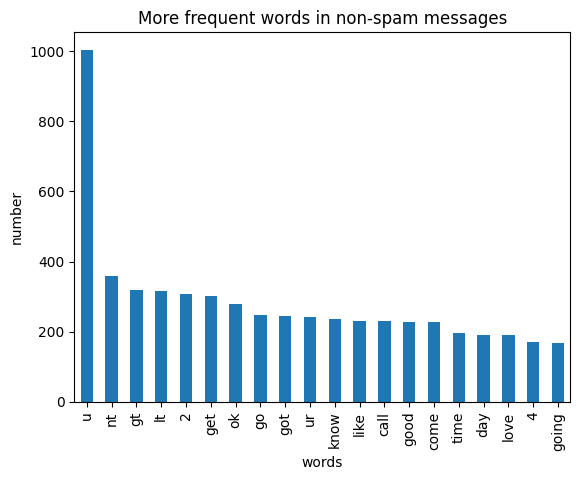

In [ ]:
# load the results as a pandas dataframe in order to plot
df_ham = pd.DataFrame(counter_ham)

# Renaming the columns in this dataframe
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

# Plotting the data
df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

[link text](https://)We can see words like "love", "time", "got", "go", etc tend to occur a lot in ham messages.

Similarily, we plot the data for 20 most common words in spam texts.

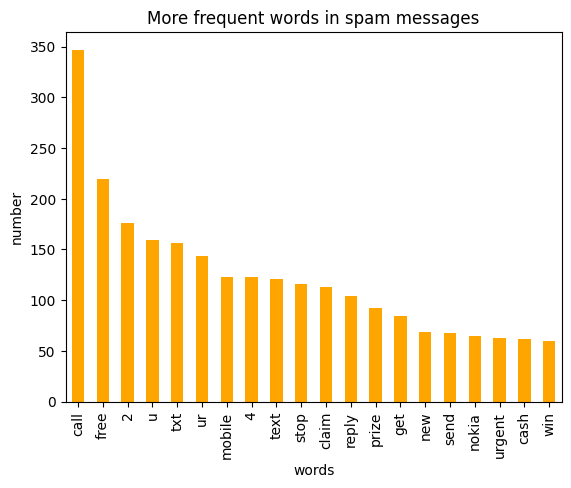

In [ ]:
# Invoking the Counter() object on a list of words occuring in the "cleaned_message" column of spam texts, joined together
counter_spam = Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)

# load the results as a pandas dataframe in order to plot
df_spam = pd.DataFrame(counter_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

We can see that there is a difference of words contained in spam and ham messages.

Spam messages have words like, "call", "free", "mobile", "claim", "prize", etc.


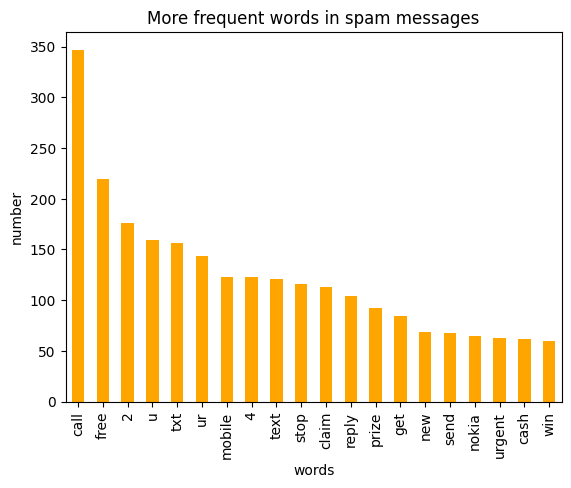

In [ ]:
# Invoking the Counter() object on a list of words occuring in the "cleaned_message" column of spam texts, joined together
counter_spam = Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)

# load the results as a pandas dataframe in order to plot
df_spam = pd.DataFrame(counter_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Converting the categorical feature `type` into a numerical feature by mapping spam value as 1, and ham values as 0.

In [ ]:
df["type"] = df["type"].map({'spam':1,'ham':0})

Performing the `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


In [ ]:
from sklearn import feature_extraction, naive_bayes, metrics

#Count Vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

print(X_train.shape,X_test.shape)

(4179, 7615) (1393, 7615)


In [ ]:
params = {
        'alpha':[0.01, 0.1, 1, 10]
        }

In [ ]:

from sklearn.model_selection import GridSearchCV

mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'alpha': 0.01} Mean_score: 0.8937240112174837 Rank: 2
Parameters:{'alpha': 0.1} Mean_score: 0.8896934746467166 Rank: 3
Parameters:{'alpha': 1} Mean_score: 0.9022297472053865 Rank: 1
Parameters:{'alpha': 10} Mean_score: 0.8603433402346446 Rank: 4


In [ ]:
mnb = naive_bayes.MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

print(metrics.f1_score(y_test,y_pred))


0.9214092140921409
